# Grid World Policy Evaluation and Improvement

In this notebook, we will perform policy evaluation and improvement on a simple grid world.

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the grid world
grid_world = np.array([
    [0,  0,  0,  -1],
    [0, -1,  0,   0],
    [0,  0,  0,   10],
    [1,  0,  0,   5]
])

# Define reward function
reward_function = {
    (2, 3): 10,   # Changed reward position
    (1, 1): -1,   # Changed obstacle position
    (3, 0): 1,
    (3, 3): 5
}


# Function to Compute Value Function using Policy Evaluation

In [11]:
def compute_value_function(grid_world, reward_function, gamma=1.0, theta=1e-6):
    V = np.zeros_like(grid_world, dtype=np.float32)
    
    while True:
        delta = 0
        for i in range(grid_world.shape[0]):
            for j in range(grid_world.shape[1]):
                if (i, j) in reward_function:
                    continue  # Skip updating value for reward pots
                if grid_world[i, j] == -1:
                    continue  # Skip updating value for obstacles

                # Calculate the expected value for each action (up, down, left, right)
                v = V[i, j]
                max_value = -np.inf
                for action in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
                    ni, nj = i + action[0], j + action[1]
                    if 0 <= ni < grid_world.shape[0] and 0 <= nj < grid_world.shape[1]:
                        if grid_world[ni, nj] != -1:
                            action_value = reward_function.get((ni, nj), 0) + gamma * V[ni, nj]
                            max_value = max(max_value, action_value)
                
                V[i, j] = max_value
                delta = max(delta, np.abs(v - V[i, j]))
        
        if delta < theta:
            break
    
    return V

# Function for Policy Improvement

In [12]:
def policy_improvement(grid_world, reward_function, V, gamma=1.0):
    policy = np.zeros_like(grid_world, dtype=int)
    
    for i in range(grid_world.shape[0]):
        for j in range(grid_world.shape[1]):
            if (i, j) in reward_function or grid_world[i, j] == -1:
                continue  # Skip reward pots and obstacles
            
            max_action_value = -np.inf
            best_action = None
            
            for idx, action in enumerate([(0, 1), (0, -1), (1, 0), (-1, 0)]):
                ni, nj = i + action[0], j + action[1]
                if 0 <= ni < grid_world.shape[0] and 0 <= nj < grid_world.shape[1]:
                    if grid_world[ni, nj] != -1:
                        action_value = reward_function.get((ni, nj), 0) + gamma * V[ni, nj]
                        if action_value > max_action_value:
                            max_action_value = action_value
                            best_action = idx
            
            policy[i, j] = best_action
    
    return policy

# Function to Visualize Policy and Value Function

In [13]:
def visualize_policy(policy, V):
    fig, ax = plt.subplots()
    ax.matshow(V, cmap='coolwarm')

    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            if policy[i, j] == 0:  # Right
                arrow = '>'
            elif policy[i, j] == 1:  # Left
                arrow = '<'
            elif policy[i, j] == 2:  # Down
                arrow = 'v'
            elif policy[i, j] == 3:  # Up
                arrow = '^'
            else:
                arrow = 'X'  # Mark invalid policies with 'X'
            
            ax.text(j, i, arrow, va='center', ha='center', fontsize=12)

    plt.show()

# Compute Optimal Value Function

In [14]:
optimal_V = compute_value_function(grid_world, reward_function)

# Compute Optimal Policy

In [15]:
optimal_policy = policy_improvement(grid_world, reward_function, optimal_V)

# Display the Optimal Policy

In [16]:
directions = ['Right', 'Left', 'Down', 'Up']
policy_symbols = np.array(['R', 'L', 'D', 'U'])

optimal_policy_str = np.array([directions[action] for action in optimal_policy.flatten()]).reshape(grid_world.shape)
print("Optimal Policy:")
print(optimal_policy_str)

Optimal Policy:
[['Right' 'Right' 'Left' 'Right']
 ['Down' 'Right' 'Right' 'Left']
 ['Right' 'Right' 'Right' 'Right']
 ['Right' 'Right' 'Left' 'Right']]


# Visualize the Optimal Policy and Value Function

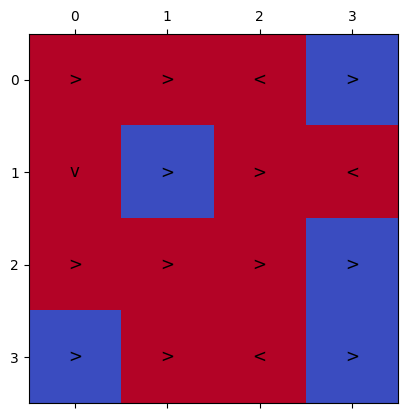

In [17]:
visualize_policy(optimal_policy, optimal_V)